## Checkpoint \#01
---

At this point, we have:

*   Clean our data to remove any special characters and non-alphanumeric characters.
*   Balanced out our data to have 50% `isDisaster = 1` and `isDisaster = 0`
*   Visualise our data using various data visualization tools
*   Pre-process our data to prepare for deep learning
*   Dataset:  
> `training_padded` - Tweets for training  
> `testing_padded` - Tweets for testing  
> `isDisaster_train` - Category for tweet, training data  
> `isDisaster_test` - Category for tweet, testing data  


## Dense Network
---
Code below explains the dense model architecture

In [ ]:
vocab_size = 13000 #Defined earlier as number_of_tokens
embeding_dim = 16
drop_value = 0.2
n_dense = 24

Implementation of the dense model

*   The `sequential` calls for keras sequential model in which layers are added in a sequence
*   First layer: `Embedding layer` where it takes the integer-encoded vocabularly which was performed by tokenization function during the pre-processing of data which looks up the embedding vector for each word index
*   `GlobalAveragePooling layer` then returns a fixed length output vector for each example by averaging over the sequence dimension which allows the model to handle input of variable length in the simplest way and we have converted layer to 1 dimension
*   `Dense layer` with activation function `'relu'` 
*   `Dropouut layer` that prevents overfitting of data
*   `Dense layer` with `sigmoid` activation function that outputs the probabilities between 0 and 1 to classify our output




In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,embeding_dim,input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24,activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 75, 16)            208000    
                                                                 
 global_average_pooling1d_3   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_8 (Dense)             (None, 24)                408       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 208,433
Trainable params: 208,433
Non-trainable params: 0
________________________________________________

Compile and train the model using the `Adam optimizer` which is an efficient stochastic gradient descent because it automatically tunes itself and gives good results in a wide range of problems and the `BinaryCrossentropy loss` which is for binary classification problems

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

### Fitting of Model

The training process will run for a fixed number of iterations through the dataset which is called `Epochs`. 

`Epoch:` Number of times the learning algorithm will work through the entire training data set

`Callbacks: `callbacks is used to pass the early stopping parameter 

`EarlyStopping` (monitor='val_loss',patience=2) is used to define that we want to monitor the validation loss and if the validation loss is not improved after two epochs, then the model training is stopped. It helps to avoid overfitting problem and indicates when to stop training before the learner begins over-fit

In [ ]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss',patience=3)
history = model.fit(training_padded, isDisaster_train, epochs=num_epochs, validation_data=(testing_padded, isDisaster_test),callbacks=[early_stop],verbose=2)

**Evaluate our Model**

After training our neural network using the dense model on the entire dataset, we can now evaluate the performance of the network on the same dataset. 

This will provide us the idea of how well we have modeled the dataset (e.g. train accuracy). 
By using the evaluate() function it will return a list with two values. The first value will be the loss of the model on the dataset while the second will be the accuracy of the model on the dataset. 

In [ ]:
loss, accuracy = model.evaluate(testing_padded,isDisaster_test)
print('Accuracy:', round((accuracy*100),2),'%')
print('Loss:',round((loss*100),2),'%')

In [ ]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss':'Training_Loss','accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'},inplace=True)
def plot_graphs1(var1,var2,string):
  metrics[[var1,var2]].plot()
  plt.title('Training and Validation' + string)
  plt.xlabel('Number of epochs')
  plt.ylabel(string)
  plt.legend([var1,var2])

In [ ]:
plot_graphs1('Training_Loss','Validation_Loss','loss')

In [ ]:
plot_graphs1('Training_Accuracy','Validation_Accuracy','accuracy')

## Dense Network (Overfitting)

This model as shown below is most likely to be overfitting. The model as shown as 2 densely connected layers of 64 elements.

In the beginning, the validation loss decreases. However, at approximately epochs 4, validation loss does not continue to decrease but instead, it increases rapidly. This shows that this is where it begins to overfit. 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 75, 16)            208000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 64)                1088      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 213,313
Trainable params: 213,313
Non-trainable params: 0
________________________________________________

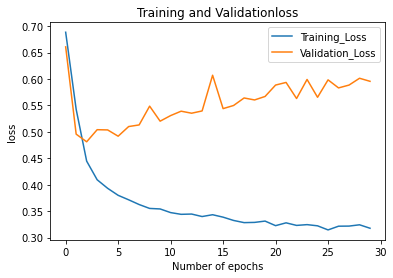

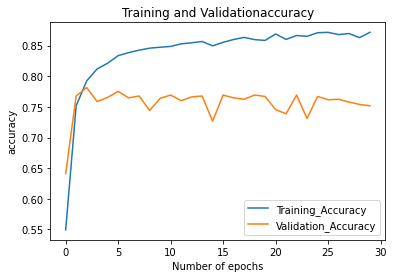

In [ ]:
vocab_size = 13000 #Defined earlier as number_of_tokens
embeding_dim = 16
drop_value = 0.2
n_dense = 24

overfitmodel = Sequential()
overfitmodel.add(Embedding(vocab_size,embeding_dim,input_length=max_len))
overfitmodel.add(GlobalAveragePooling1D())
overfitmodel.add(Dense(64,activation='relu'))
overfitmodel.add(Dense(64,activation='relu'))
overfitmodel.add(Dense(1,activation='sigmoid'))

overfitmodel.summary()

overfitmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

num_epochs = 30
history = overfitmodel.fit(training_padded, isDisaster_train, epochs=num_epochs, validation_data=(testing_padded, isDisaster_test),verbose=2)


loss, accuracy = overfitmodel.evaluate(testing_padded,isDisaster_test)
print('Accuracy:', round((accuracy*100),2),'%')
print('Loss:',round((loss*100),2),'%')

metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss':'Training_Loss','accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'},inplace=True)
def plot_graphs1(var1,var2,string):
  metrics[[var1,var2]].plot()
  plt.title('Training and Validation' + string)
  plt.xlabel('Number of epochs')
  plt.ylabel(string)
  plt.legend([var1,var2])


plot_graphs1('Training_Loss','Validation_Loss','loss')
plot_graphs1('Training_Accuracy','Validation_Accuracy','accuracy')

### Confusion matrices: Overfitted data

Confusion matrix will provide us with the details of the data's accuracy, precision, recall, F1 score and the false positive rate. 

[Text(452.23636363636354, 0.5, 'Actual'),
 Text(0.5, 15.0, 'Predicted\n\nAccuracy=0.75\nPrecision=0.78\nRecall=0.73\nFalse positive rate=0.22\nF1 Score=0.75'),
 Text(0.5, 1.0, 'Testing set')]

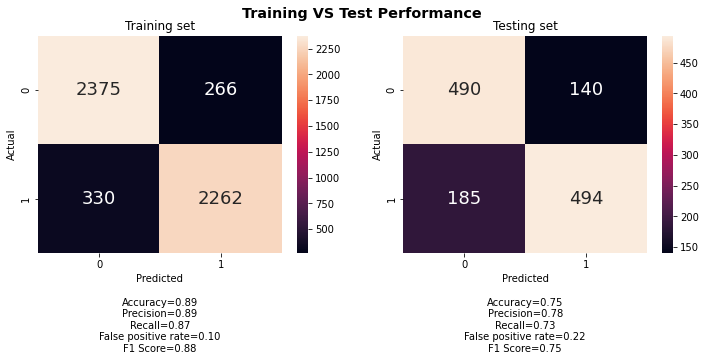

In [ ]:
# Visualise data
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.metrics import confusion_matrix
# Confusion matrix for train and test set

#Train prediction
train_predicted = (overfitmodel.predict(training_padded)>=0.5).astype('int64')

#Test prediction
test_predicted = (overfitmodel.predict(testing_padded)>=0.5).astype('int64')

#Plotting of confusion matrix 
f, axes = plt.subplots(1, 2, figsize=(12, 4))
f.suptitle('Training VS Test Performance',fontweight = 'bold', fontsize = 'x-large')

#Train confusion matrix 
sb.heatmap(confusion_matrix(isDisaster_train, train_predicted),
    annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])


sb.heatmap(confusion_matrix(isDisaster_test, test_predicted), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])



#Calculate metrix for train
CM_train= confusion_matrix(isDisaster_train,train_predicted)
TN = CM_train[0][0]
FN = CM_train[1][0]
TP = CM_train[1][1]
FP = CM_train[0][1]

Accuracy_train = (TP+TN)/(TP+FN+TN+FP)
Precision_train = TP/(TP+FP)
Recall_train = TP/(TP+FN)
FPR = FP/(TN+FP)
F1_score_train = 2*Precision_train*Recall_train/(Precision_train+Recall_train)

Train_stats = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nFalse positive rate={:0.2f}\nF1 Score={:0.2f}".format(
        Accuracy_train, Precision_train, Recall_train,FPR,F1_score_train)
axes[0].set(xlabel = 'Predicted' + Train_stats,ylabel='Actual',title = 'Training set')



#Calculate metrix for test
CM_train= confusion_matrix(isDisaster_test,test_predicted)
TN = CM_train[0][0]
FN = CM_train[1][0]
TP = CM_train[1][1]
FP = CM_train[0][1]

Accuracy_test = (TP+TN)/(TP+FN+TN+FP)
Precision_test = TP/(TP+FP)
Recall_test = TP/(TP+FN)
FPR = FP/(TN+FP)
F1_score_test = 2*Precision_test*Recall_test/(Precision_test+Recall_test)

Test_stats  = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nFalse positive rate={:0.2f}\nF1 Score={:0.2f}".format(
        Accuracy_test, Precision_test, Recall_test, FPR,F1_score_test)
axes[1].set(xlabel = 'Predicted'+Test_stats,ylabel='Actual',title = 'Testing set')

## Dense Network (After handling overfit data)
---

To handle overfitting of data, 


1.   Reduce the network's capacity where we remove layers and reduce the number of elements in the hidden layer as seen. 
2.   Included a dropout layer in order to prevent overfitting of data

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 75, 16)            208000    
                                                                 
 global_average_pooling1d_2   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 208,289
Trainable params: 208,289
Non-trainable params: 0
________________________________________________

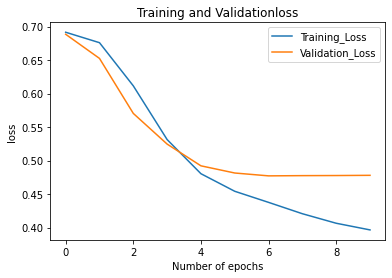

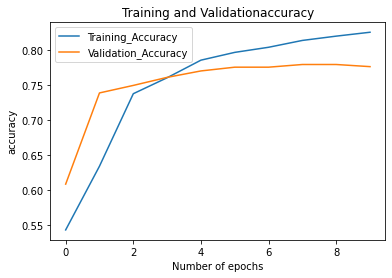

In [ ]:
vocab_size = 13000 #Defined earlier as number_of_tokens
embeding_dim = 16
drop_value = 0.2
n_dense = 24

model = Sequential()
model.add(Embedding(vocab_size,embeding_dim,input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16,activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1,activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss',patience=3)
history = model.fit(training_padded, isDisaster_train, epochs=num_epochs, validation_data=(testing_padded, isDisaster_test),callbacks=[early_stop],verbose=2)


loss, accuracy = model.evaluate(testing_padded,isDisaster_test)
print('Accuracy:', round((accuracy*100),2),'%')
print('Loss:',round((loss*100),2),'%')

metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss':'Training_Loss','accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'},inplace=True)
def plot_graphs1(var1,var2,string):
  metrics[[var1,var2]].plot()
  plt.title('Training and Validation' + string)
  plt.xlabel('Number of epochs')
  plt.ylabel(string)
  plt.legend([var1,var2])


plot_graphs1('Training_Loss','Validation_Loss','loss')
plot_graphs1('Training_Accuracy','Validation_Accuracy','accuracy')

### Confusion matrices: After handling overfitted data

Confusion matrix will provide us with the details of the data's accuracy, precision, recall, F1 score and the false positive rate. 

[Text(452.23636363636354, 0.5, 'Actual'),
 Text(0.5, 15.0, 'Predicted\n\nAccuracy=0.78\nPrecision=0.81\nRecall=0.75\nFalse positive rate=0.19\nF1 Score=0.78'),
 Text(0.5, 1.0, 'Testing set')]

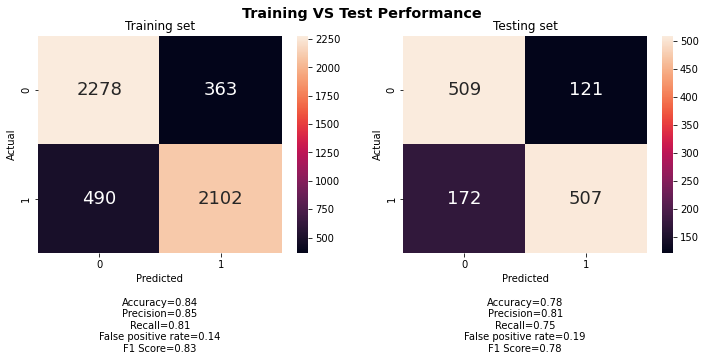

In [ ]:
# Visualise data
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.metrics import confusion_matrix
# Confusion matrix for train and test set

#Train prediction
train_predicted = (model.predict(training_padded)>=0.5).astype('int64')

#Test prediction
test_predicted = (model.predict(testing_padded)>=0.5).astype('int64')

#Plotting of confusion matrix 
f, axes = plt.subplots(1, 2, figsize=(12, 4))
f.suptitle('Training VS Test Performance',fontweight = 'bold', fontsize = 'x-large')

#Train confusion matrix 
sb.heatmap(confusion_matrix(isDisaster_train, train_predicted),
    annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])


sb.heatmap(confusion_matrix(isDisaster_test, test_predicted), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])



#Calculate metrix for train
CM_train= confusion_matrix(isDisaster_train,train_predicted)
TN = CM_train[0][0]
FN = CM_train[1][0]
TP = CM_train[1][1]
FP = CM_train[0][1]

Accuracy_train = (TP+TN)/(TP+FN+TN+FP)
Precision_train = TP/(TP+FP)
Recall_train = TP/(TP+FN)
FPR = FP/(TN+FP)
F1_score_train = 2*Precision_train*Recall_train/(Precision_train+Recall_train)

Train_stats = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nFalse positive rate={:0.2f}\nF1 Score={:0.2f}".format(
        Accuracy_train, Precision_train, Recall_train,FPR,F1_score_train)
axes[0].set(xlabel = 'Predicted' + Train_stats,ylabel='Actual',title = 'Training set')



#Calculate metrix for test
CM_train= confusion_matrix(isDisaster_test,test_predicted)
TN = CM_train[0][0]
FN = CM_train[1][0]
TP = CM_train[1][1]
FP = CM_train[0][1]

Accuracy_test = (TP+TN)/(TP+FN+TN+FP)
Precision_test = TP/(TP+FP)
Recall_test = TP/(TP+FN)
FPR = FP/(TN+FP)
F1_score_test = 2*Precision_test*Recall_test/(Precision_test+Recall_test)

Test_stats  = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nFalse positive rate={:0.2f}\nF1 Score={:0.2f}".format(
        Accuracy_test, Precision_test, Recall_test, FPR,F1_score_test)
axes[1].set(xlabel = 'Predicted'+Test_stats,ylabel='Actual',title = 'Testing set')

## Comparision of results (Dense Network)
---
The bar plot helps to compare between the accuracy of the data that were overfitted and the accurcay of the data after we had handled the overfitting of data.

Clearly, after handling the overfitting of our data, it have help to increase the accuracy of our data.

41/41 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7762


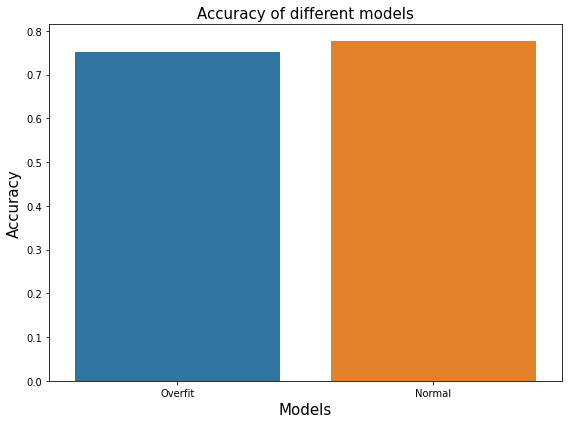

In [ ]:
# Visualise data before and after we fix overfitting data in terms of accuracy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as isDisaster_tweets_numpy
import seaborn as sns

overfitDense_loss,overfitDense_accuracy = overfitmodel.evaluate(testing_padded,isDisaster_test)
Dense_loss,Dense_accuracy = model.evaluate(testing_padded,isDisaster_test)


models = ['Overfit','Normal']
accuracy = [overfitDense_accuracy,Dense_accuracy]

df = pd.DataFrame({"Models":models,"Accuracy":accuracy})
df

plt.figure(figsize=(8,6))
sns.barplot(x='Models',y="Accuracy",data=df,order=df.sort_values('Accuracy').Models)
plt.xlabel("Models",size = 15)
plt.ylabel("Accuracy",size = 15)
plt.title("Accuracy of different models",size = 15)
plt.tight_layout()

## LSTM Model
---
Long short term memory networks are a special kind of RNN that are capable of learning long-term dependencies. LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavour. 


In [ ]:
n_lstm = 20
drop_lstm = 0.2

In [ ]:
model1 = Sequential()
model1.add(Embedding(vocab_size, embeding_dim, input_length = max_len))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss',patience=2)
history = model1.fit(training_padded,isDisaster_train,epochs=num_epochs,validation_data=(testing_padded,isDisaster_test),callbacks=[early_stop],verbose=2)


Epoch 1/30
164/164 - 8s - loss: 0.6666 - accuracy: 0.5835 - val_loss: 0.5902 - val_accuracy: 0.7309 - 8s/epoch - 50ms/step
Epoch 2/30
164/164 - 5s - loss: 0.5396 - accuracy: 0.7588 - val_loss: 0.5885 - val_accuracy: 0.7395 - 5s/epoch - 32ms/step
Epoch 3/30
164/164 - 5s - loss: 0.5068 - accuracy: 0.7867 - val_loss: 0.5420 - val_accuracy: 0.7589 - 5s/epoch - 32ms/step
Epoch 4/30
164/164 - 5s - loss: 0.4809 - accuracy: 0.7960 - val_loss: 0.5306 - val_accuracy: 0.7453 - 5s/epoch - 32ms/step
Epoch 5/30
164/164 - 5s - loss: 0.4577 - accuracy: 0.8093 - val_loss: 0.5155 - val_accuracy: 0.7603 - 5s/epoch - 32ms/step
Epoch 6/30
164/164 - 5s - loss: 0.4465 - accuracy: 0.8126 - val_loss: 0.5111 - val_accuracy: 0.7586 - 5s/epoch - 32ms/step
Epoch 7/30
164/164 - 5s - loss: 0.4266 - accuracy: 0.8237 - val_loss: 0.5094 - val_accuracy: 0.7608 - 5s/epoch - 32ms/step
Epoch 8/30
164/164 - 6s - loss: 0.4191 - accuracy: 0.8279 - val_loss: 0.5600 - val_accuracy: 0.7591 - 6s/epoch - 35ms/step
Epoch 9/30
164/1

In [ ]:
model1.evaluate(testing_padded,isDisaster_test)

41/41 [==============================] - 0s 8ms/step - loss: 0.5122 - accuracy: 0.7671


[0.5121646523475647, 0.7671098709106445]

In [ ]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

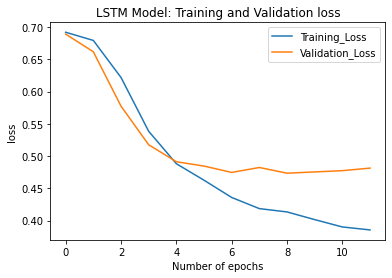

In [ ]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

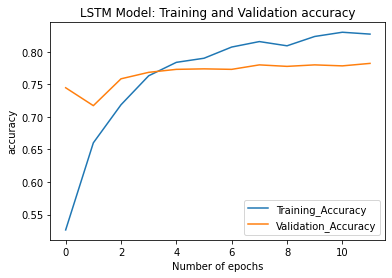

In [ ]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

## Bi-directional LSTM
---
Lastly, we carried out bi-directional long short term memory to train our model. Bidirectional long short term memory is the process of making any neural network have the sequence information in both direction. The input would flow in two directions which caused it to differ from the long-short term memory that we used before. 

In [ ]:
model2 = Sequential()
model2.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model2.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True)))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model2.fit(training_padded, isDisaster_train, epochs=num_epochs, 
                    validation_data=(testing_padded, isDisaster_test),callbacks =[early_stop], verbose=2)

Epoch 1/30
164/164 - 14s - loss: 0.6636 - accuracy: 0.5841 - val_loss: 0.5710 - val_accuracy: 0.7151 - 14s/epoch - 85ms/step
Epoch 2/30
164/164 - 8s - loss: 0.5586 - accuracy: 0.7507 - val_loss: 0.5364 - val_accuracy: 0.7554 - 8s/epoch - 48ms/step
Epoch 3/30
164/164 - 8s - loss: 0.5211 - accuracy: 0.7734 - val_loss: 0.5202 - val_accuracy: 0.7584 - 8s/epoch - 48ms/step
Epoch 4/30
164/164 - 8s - loss: 0.4490 - accuracy: 0.8128 - val_loss: 0.4858 - val_accuracy: 0.7719 - 8s/epoch - 49ms/step
Epoch 5/30
164/164 - 8s - loss: 0.4165 - accuracy: 0.8288 - val_loss: 0.5101 - val_accuracy: 0.7736 - 8s/epoch - 46ms/step
Epoch 6/30
164/164 - 8s - loss: 0.4035 - accuracy: 0.8382 - val_loss: 0.4982 - val_accuracy: 0.7748 - 8s/epoch - 47ms/step


In [ ]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('BiLSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

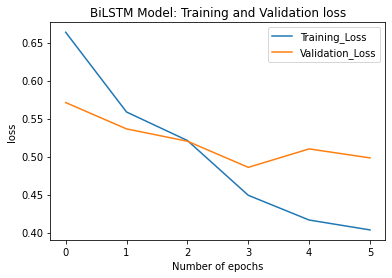

In [ ]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

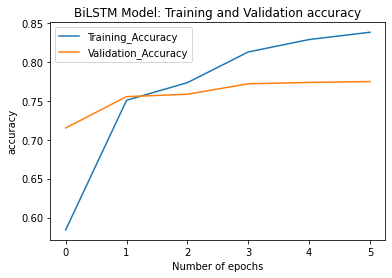

In [ ]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')